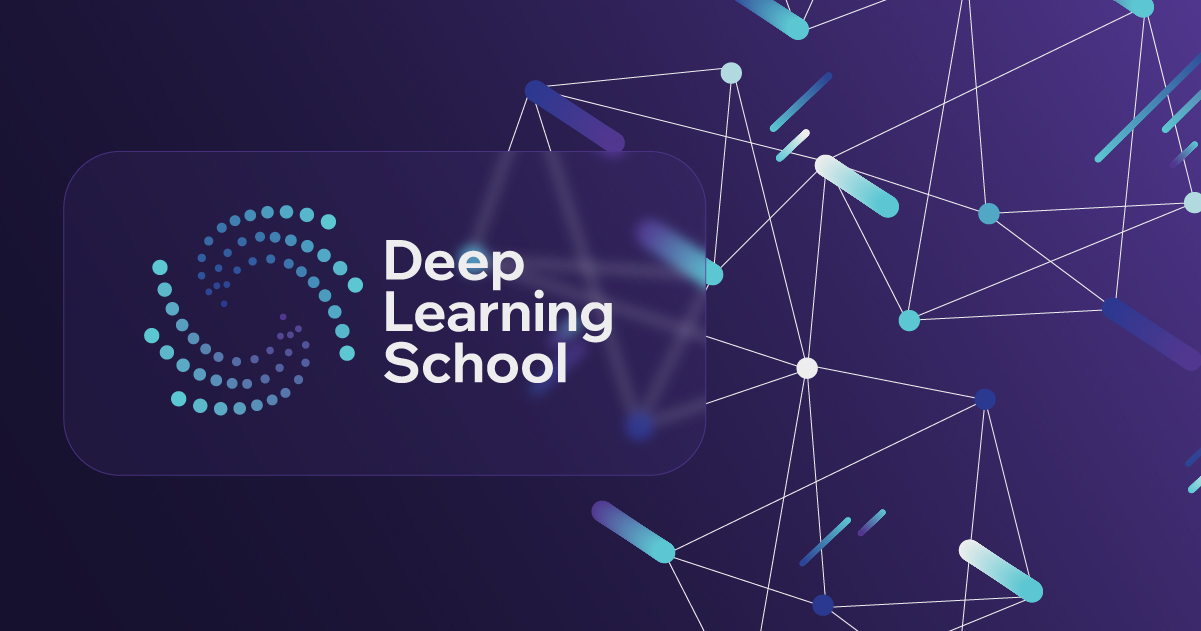

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

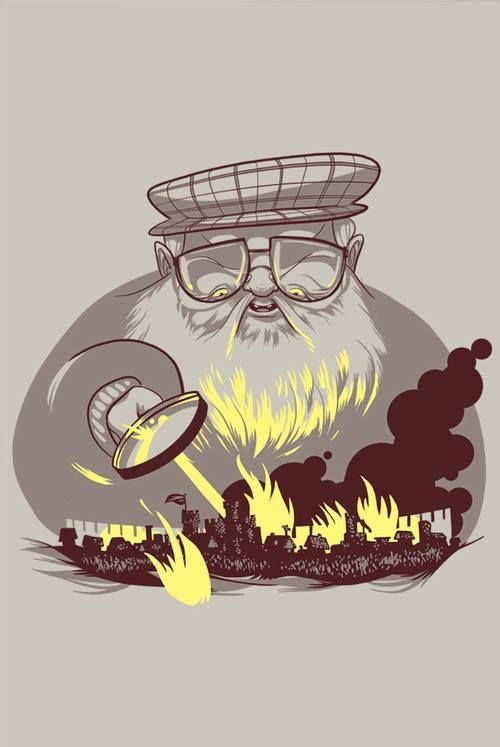

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.75$ --- 5 баллов

2) $0.75 > score \geqslant 0.65$ --- 4 балла

3) $0.65 > score \geqslant 0.55$ --- 3 балла

4) $0.55 > score \geqslant 0.50$ --- 2 балла

5) $0.50 > score \geqslant 0.45$ --- 1 балл

6) $0.45 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [474]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 48.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 101MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [475]:
# ...

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [476]:
data = pd.read_csv("/content/game_of_thrones_train.csv", index_col='S.No')

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [477]:
# ...

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [478]:
def fill_numeric_missing_with_median(df):
    """
    Заменяет пропущенные значения (NaN) в числовых столбцах DataFrame на медианные значения.
    Нечисловые столбцы остаются без изменений.

    Параметры:
    ----------
    df : pandas.DataFrame
        Входной DataFrame с пропущенными значениями.

    Возвращает:
    -----------
    pandas.DataFrame
        DataFrame с заменёнными пропущенными значениями в числовых столбцах.
    """
    df_filled = df.copy()

    for column in df_filled.columns:
        # Проверяем, что столбец числовой (int или float)
        if pd.api.types.is_numeric_dtype(df_filled[column]):
            # Проверяем, есть ли в столбце пропуски
            if df_filled[column].isnull().any():
                median_value = df_filled[column].median()
                # Если медиана не NaN (например, если столбец не полностью пустой)
                if pd.notna(median_value):
                    df_filled[column].fillna(median_value, inplace=True)
        # Нечисловые столбцы пропускаем
    return df_filled

filled_df = fill_numeric_missing_with_median(data)

cols = ['title','mother','house','spouse','culture','father','heir']
filled_df[cols] = filled_df[cols].fillna("unknown")

df = filled_df.copy()

# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

def simplify_culture(culture):
    if pd.isna(culture):
        return np.nan
    culture_lower = culture.lower()
    for main_cult, variants in cult.items():
        if culture_lower in [v.lower() for v in variants]:
            return main_cult
    return culture  # если культура не найдена в словаре, оставляем как есть

df['isPopular'] = (df['popularity'] > 0.5).astype(int)
df['boolDeadRelations'] = (df['numDeadRelations'] > 0).astype(int)
df['culture_simplified'] = df['culture'].apply(simplify_culture)

df_encoded = df.copy()

drop_cols = ['name','mother','culture','father','heir','male','book1','book2','book3','book4','book5','isAliveMother','isAliveFather','isAliveSpouse','isMarried','isNoble']
test_df = df_encoded.drop(columns=drop_cols)


**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [479]:
isAlive = 'isAlive'
X = test_df.drop(columns=[isAlive])  # все колонки, кроме 'purchased'
y = test_df[isAlive]

In [480]:
X

title  dateOfBirth              house  \
S.No                                                         
1                  unknown        272.0            unknown   
2     Lord of the Crossing        208.0         House Frey   
3                      Ser        272.0        House Swyft   
4                    Queen         82.0        House Arryn   
5               Greenstone        276.0     House Santagar   
...                    ...          ...                ...   
1553           Archmaester        272.0            unknown   
1554               unknown        272.0            unknown   
1555               unknown        272.0     House Seaworth   
1556               unknown        283.0         House Reed   
1557               unknown        264.0  House Hetherspoon   

                   spouse  isAliveHeir   age  numDeadRelations  popularity  \
S.No                                                                         
1                 unknown          0.0  24.0                11    0.605351   
2             Perra Royce          1.0  97.0                 1    0.896321   
3                 unknown          1.0  24.0                 0    0.267559   
4     Viserys I Targaryen          1.0  23.0                 0    0.183946   
5         Eldon Estermont          1.0  29.0                 0    0.043478   
...                   ...          ...   ...               ...         ...   
1553              unknown          1.0  24.0                 0    0.160535   
1554              unknown          1.0  24.0                 0    0.040134   
1555              unknown          1.0  24.0                 0    0.076923   
1556              unknown          1.0  22.0                 0    0.270903   
1557              unknown          1.0  12.0                 0    0.046823   

      isPopular  boolDeadRelations culture_simplified  
S.No                                                   
1             1                  1            unknown  
2             1                  1           Rivermen  
3             0                  0            unknown  
4             0                  0            unknown  
5             0                  0            Dornish  
...         ...                ...                ...  
1553          0                  0            unknown  
1554          0                  0            unknown  
1555          0                  0            unknown  
1556          0                  0         Crannogmen  
1557          0                  0            unknown  

[1557 rows x 11 columns]

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [481]:
from sklearn.model_selection import train_test_split

In [482]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


In [483]:
X_train

title  dateOfBirth                        house  \
S.No                                                                    
35                  unknown        272.0                      unknown   
990                     Ser        272.0                  House Arryn   
1401                unknown        272.0                      unknown   
1397                unknown        249.0                  House Stark   
694                 unknown        272.0                      unknown   
...                     ...          ...                          ...   
793                 unknown        272.0  Brotherhood without banners   
249                 unknown        285.0       House Frey of Riverrun   
1472                    Ser        272.0                 House Blount   
1193                 Wraith        272.0               House Seaworth   
1131  Lord of the Snakewood        272.0               House Lynderly   

       spouse  isAliveHeir   age  numDeadRelations  popularity  isPopular  \
S.No                                                                        
35    unknown          1.0  24.0                 0    0.020067          0   
990   unknown          1.0  24.0                 0    0.083612          0   
1401  unknown          1.0  24.0                 0    0.026756          0   
1397  unknown          1.0  49.0                 0    0.063545          0   
694   unknown          1.0  24.0                 0    0.006689          0   
...       ...          ...   ...               ...         ...        ...   
793   unknown          1.0  24.0                 0    0.000000          0   
249   unknown          1.0  20.0                 0    0.000000          0   
1472  unknown          1.0  24.0                 0    0.217391          0   
1193  unknown          1.0  24.0                 0    0.070234          0   
1131  unknown          1.0  24.0                 0    0.023411          0   

      boolDeadRelations culture_simplified  
S.No                                        
35                    0     Summer Islands  
990                   0            unknown  
1401                  0          Free Folk  
1397                  0           Northmen  
694                   0          Free Folk  
...                 ...                ...  
793                   0            unknown  
249                   0            unknown  
1472                  0            unknown  
1193                  0            unknown  
1131                  0            unknown  

[1089 rows x 11 columns]

In [484]:
from sklearn.preprocessing import OneHotEncoder
import joblib

In [485]:
categorical_cols = ['title','house','spouse','culture_simplified']

# Создаем копии категориальных признаков перед преобразованием
X_train_cat = X_train[categorical_cols].copy()
X_test_cat = X_test[categorical_cols].copy()

# Инициализируем и обучаем OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(X_train_cat)

# Преобразуем категориальные признаки
encoded_train = encoder.transform(X_train_cat)
encoded_test = encoder.transform(X_test_cat)

# Создаем DataFrame из закодированных признаков
encoded_train_df = pd.DataFrame(encoded_train,
                               columns=encoder.get_feature_names_out(categorical_cols),
                               index=X_train.index)
encoded_test_df = pd.DataFrame(encoded_test,
                              columns=encoder.get_feature_names_out(categorical_cols),
                              index=X_test.index)

# Удаляем исходные категориальные признаки и соединяем с закодированными
X_train = X_train.drop(columns=categorical_cols).join(encoded_train_df)
X_test = X_test.drop(columns=categorical_cols).join(encoded_test_df)

# Сохраняем encoder
joblib.dump(encoder, 'onehot_encoder.pkl')

['onehot_encoder.pkl']

In [486]:
def clean_feature_names(feature_names):
    return [str(feature).replace(" ", "_").replace("<", "_lt_").replace(">", "_gt_").replace("[", "_").replace("]", "_").replace(",", "_").replace("=", "_eq_") for feature in feature_names]

# Очищаем имена признаков
X_train.columns = clean_feature_names(X_train.columns)
X_test.columns = clean_feature_names(X_test.columns)

X_train

dateOfBirth  isAliveHeir   age  numDeadRelations  popularity  isPopular  \
S.No                                                                            
35          272.0          1.0  24.0                 0    0.020067          0   
990         272.0          1.0  24.0                 0    0.083612          0   
1401        272.0          1.0  24.0                 0    0.026756          0   
1397        249.0          1.0  49.0                 0    0.063545          0   
694         272.0          1.0  24.0                 0    0.006689          0   
...           ...          ...   ...               ...         ...        ...   
793         272.0          1.0  24.0                 0    0.000000          0   
249         285.0          1.0  20.0                 0    0.000000          0   
1472        272.0          1.0  24.0                 0    0.217391          0   
1193        272.0          1.0  24.0                 0    0.070234          0   
1131        272.0          1.0  24.0                 0    0.023411          0   

      boolDeadRelations  title_Archmaester  title_Ashford  title_Banefort  \
S.No                                                                        
35                    0                0.0            0.0             0.0   
990                   0                0.0            0.0             0.0   
1401                  0                0.0            0.0             0.0   
1397                  0                0.0            0.0             0.0   
694                   0                0.0            0.0             0.0   
...                 ...                ...            ...             ...   
793                   0                0.0            0.0             0.0   
249                   0                0.0            0.0             0.0   
1472                  0                0.0            0.0             0.0   
1193                  0                0.0            0.0             0.0   
1131                  0                0.0            0.0             0.0   

      ...  culture_simplified_Summer_Islands  culture_simplified_Tyroshi  \
S.No  ...                                                                  
35    ...                                1.0                         0.0   
990   ...                                0.0                         0.0   
1401  ...                                0.0                         0.0   
1397  ...                                0.0                         0.0   
694   ...                                0.0                         0.0   
...   ...                                ...                         ...   
793   ...                                0.0                         0.0   
249   ...                                0.0                         0.0   
1472  ...                                0.0                         0.0   
1193  ...                                0.0                         0.0   
1131  ...                                0.0                         0.0   

      culture_simplified_Vale  culture_simplified_Vale_mountain_clans  \
S.No                                                                    
35                        0.0                                     0.0   
990                       0.0                                     0.0   
1401                      0.0                                     0.0   
1397                      0.0                                     0.0   
694                       0.0                                     0.0   
...                       ...                                     ...   
793                       0.0                                     0.0   
249                       0.0                                     0.0   
1472                      0.0                                     0.0   
1193                      0.0                                     0.0   
1131                      0.0                                     0.0   

      cultu

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [487]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [488]:
!pip install lightgbm xgboost catboost

from sklearn.ensemble import (AdaBoostClassifier,
                             RandomForestClassifier,
                             GradientBoostingClassifier)
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [489]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

In [490]:

# Инициализация всех классификаторов
classifiers = {
    "AdaBoost": AdaBoostClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    # "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "Gaussian Process": GaussianProcessClassifier(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

In [ ]:
# # Создаем список для хранения результатов
# results = []

# for name, clf in classifiers.items():
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)

#     # Вычисляем все метрики
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred, average='weighted')  # для многоклассовой
#     recall = recall_score(y_test, y_pred, average='weighted')
#     f1 = f1_score(y_test, y_pred, average='weighted')

#     # Сохраняем результаты
#     results.append({
#         'Model': name,
#         'Predictions': y_pred,
#         'Accuracy': accuracy,
#         'Precision': precision,
#         'Recall': recall,
#         'F1': f1
#     })

#     # Выводим метрики
#     print(f"\n{name}:")
#     print(f"Accuracy: {accuracy:.4f}")
#     print(f"Precision: {precision:.4f}")
#     print(f"Recall: {recall:.4f}")
#     print(f"F1-score: {f1:.4f}")

# # Преобразуем в DataFrame
# results_df = pd.DataFrame(results)

# # Дополнительно: создаем красивую таблицу с метриками
# metrics_df = results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1']]
# print("\nСводная таблица метрик:")
# print(metrics_df.to_string(index=False))

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [492]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [493]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7927


Аналогичным образом посчитайте метрику accuracy для остальных моделей

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [494]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 7.90MB/s]


In [495]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [496]:
# submission

In [497]:
validation_df =  pd.read_csv("/content/game_of_thrones_test.csv", index_col='S.No')

validation_df = fill_numeric_missing_with_median(data)

validation_df[cols] = validation_df[cols].fillna("unknown")

df_validation_filled = validation_df.copy()


df_validation_filled['isPopular'] = (df_validation_filled['popularity'] > 0.5).astype(int)
df_validation_filled['boolDeadRelations'] = (df_validation_filled['numDeadRelations'] > 0).astype(int)
df_validation_filled['culture_simplified'] = df_validation_filled['culture'].apply(simplify_culture)

df_validation_filled = df_validation_filled.drop(columns=drop_cols)



In [500]:
X_validation = df_validation_filled.drop(columns=[isAlive])
y_validation = df_validation_filled[isAlive]

In [502]:
X_validation_cat = X_validation[categorical_cols].copy()

encoded_validation = encoder.transform(X_validation_cat)

encoded_train_df = pd.DataFrame(encoded_validation,
                               columns=encoder.get_feature_names_out(categorical_cols),
                               index=X_validation.index)

X_validation = X_validation.drop(columns=categorical_cols).join(encoded_train_df)

X_validation.columns = clean_feature_names(X_validation.columns)

In [503]:
X_validation

dateOfBirth  isAliveHeir   age  numDeadRelations  popularity  isPopular  \
S.No                                                                            
1           272.0          0.0  24.0                11    0.605351          1   
2           208.0          1.0  97.0                 1    0.896321          1   
3           272.0          1.0  24.0                 0    0.267559          0   
4            82.0          1.0  23.0                 0    0.183946          0   
5           276.0          1.0  29.0                 0    0.043478          0   
...           ...          ...   ...               ...         ...        ...   
1553        272.0          1.0  24.0                 0    0.160535          0   
1554        272.0          1.0  24.0                 0    0.040134          0   
1555        272.0          1.0  24.0                 0    0.076923          0   
1556        283.0          1.0  22.0                 0    0.270903          0   
1557        264.0          1.0  12.0                 0    0.046823          0   

      boolDeadRelations  title_Archmaester  title_Ashford  title_Banefort  \
S.No                                                                        
1                     1                0.0            0.0             0.0   
2                     1                0.0            0.0             0.0   
3                     0                0.0            0.0             0.0   
4                     0                0.0            0.0             0.0   
5                     0                0.0            0.0             0.0   
...                 ...                ...            ...             ...   
1553                  0                1.0            0.0             0.0   
1554                  0                0.0            0.0             0.0   
1555                  0                0.0            0.0             0.0   
1556                  0                0.0            0.0             0.0   
1557                  0                0.0            0.0             0.0   

      ...  culture_simplified_Summer_Islands  culture_simplified_Tyroshi  \
S.No  ...                                                                  
1     ...                                0.0                         0.0   
2     ...                                0.0                         0.0   
3     ...                                0.0                         0.0   
4     ...                                0.0                         0.0   
5     ...                                0.0                         0.0   
...   ...                                ...                         ...   
1553  ...                                0.0                         0.0   
1554  ...                                0.0                         0.0   
1555  ...                                0.0                         0.0   
1556  ...                                0.0                         0.0   
1557  ...                                0.0                         0.0   

      culture_simplified_Vale  culture_simplified_Vale_mountain_clans  \
S.No                                                                    
1                         0.0                                     0.0   
2                         0.0                                     0.0   
3                         0.0                                     0.0   
4                         0.0                                     0.0   
5                         0.0                                     0.0   
...                       ...                                     ...   
1553                      0.0                                     0.0   
1554                      0.0                                     0.0   
1555                      0.0                                     0.0   
1556                      0.0                                     0.0   
1557                      0.0                                     0.0   

      cultu

In [504]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



In [505]:
X_validation

dateOfBirth  isAliveHeir   age  numDeadRelations  popularity  isPopular  \
S.No                                                                            
1           272.0          0.0  24.0                11    0.605351          1   
2           208.0          1.0  97.0                 1    0.896321          1   
3           272.0          1.0  24.0                 0    0.267559          0   
4            82.0          1.0  23.0                 0    0.183946          0   
5           276.0          1.0  29.0                 0    0.043478          0   
...           ...          ...   ...               ...         ...        ...   
1553        272.0          1.0  24.0                 0    0.160535          0   
1554        272.0          1.0  24.0                 0    0.040134          0   
1555        272.0          1.0  24.0                 0    0.076923          0   
1556        283.0          1.0  22.0                 0    0.270903          0   
1557        264.0          1.0  12.0                 0    0.046823          0   

      boolDeadRelations  title_Archmaester  title_Ashford  title_Banefort  \
S.No                                                                        
1                     1                0.0            0.0             0.0   
2                     1                0.0            0.0             0.0   
3                     0                0.0            0.0             0.0   
4                     0                0.0            0.0             0.0   
5                     0                0.0            0.0             0.0   
...                 ...                ...            ...             ...   
1553                  0                1.0            0.0             0.0   
1554                  0                0.0            0.0             0.0   
1555                  0                0.0            0.0             0.0   
1556                  0                0.0            0.0             0.0   
1557                  0                0.0            0.0             0.0   

      ...  culture_simplified_Summer_Islands  culture_simplified_Tyroshi  \
S.No  ...                                                                  
1     ...                                0.0                         0.0   
2     ...                                0.0                         0.0   
3     ...                                0.0                         0.0   
4     ...                                0.0                         0.0   
5     ...                                0.0                         0.0   
...   ...                                ...                         ...   
1553  ...                                0.0                         0.0   
1554  ...                                0.0                         0.0   
1555  ...                                0.0                         0.0   
1556  ...                                0.0                         0.0   
1557  ...                                0.0                         0.0   

      culture_simplified_Vale  culture_simplified_Vale_mountain_clans  \
S.No                                                                    
1                         0.0                                     0.0   
2                         0.0                                     0.0   
3                         0.0                                     0.0   
4                         0.0                                     0.0   
5                         0.0                                     0.0   
...                       ...                                     ...   
1553                      0.0                                     0.0   
1554                      0.0                                     0.0   
1555                      0.0                                     0.0   
1556                      0.0                                     0.0   
1557                      0.0                                     0.0   

      cultu

In [506]:
y_val = y_validation
best_model = GaussianProcessClassifier()

best_model.fit(X_train, y_train)
predictions = best_model.predict(X_validation)

# 3. Вычисление метрик
val_accuracy = accuracy_score(y_val, predictions)
val_precision = precision_score(y_val, predictions, average='weighted')
val_recall = recall_score(y_val, predictions, average='weighted')
val_f1 = f1_score(y_val, predictions, average='weighted')

# 4. Вывод результатов
print("\nРезультаты на валидационной выборке:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1-score: {val_f1:.4f}")

print(confusion_matrix(y_val, predictions))


Результаты на валидационной выборке:
Accuracy: 0.8516
Precision: 0.8696
Recall: 0.8516
F1-score: 0.8225
[[ 118  227]
 [   4 1208]]


In [507]:
from sklearn.metrics import  ConfusionMatrixDisplay

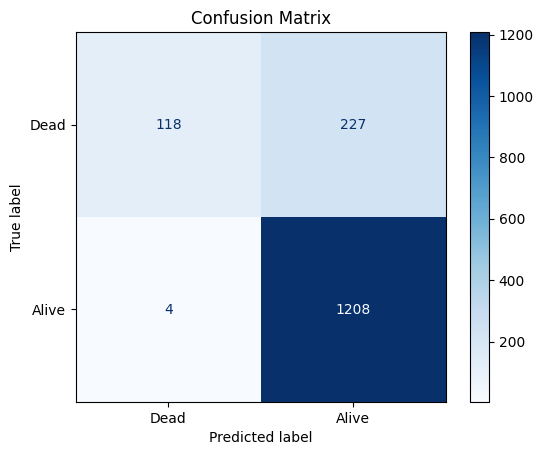

In [508]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, predictions), display_labels=["Dead", "Alive"])

disp.plot(cmap="Blues", values_format="d")  # "d" означает целые числа
plt.title("Confusion Matrix")
plt.show()

Как сохранить измененный Pandas DataFrame в csv файл:

In [509]:
# submission.to_csv("/content/new_submission.csv", index=False)